The goal of this project is to practice statistical analysis using the iterative data analysis process. For this project the Housing Prices dataset will be used. 


You need to use your statistical analysis skills to analyze this dataset. 

The goal of your analysis is to identify the most important features of houses that affect the sale prices.

### Imports

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn import metrics
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler

### Cargar el dataset que se analizará

In [2]:
df = pd.read_csv('train.csv')

### Exploración y limpieza del Dataset

In [3]:
df.shape

(1460, 81)

In [4]:
#1460 filas y 81 columnas

In [5]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
#Te niendo el nombre de las columnas podemos investigar que significan, si tenemos un Dic, Json, CSV u otra forma
#de conocer el contenido de las columnas, podemos utilizarlo para descartar columnas antes de hacer manipulación

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True, ascending=False)

In [9]:
missing_value_df.head(20)

column_name  percent_missing
PoolQC              PoolQC        99.520548
MiscFeature    MiscFeature        96.301370
Alley                Alley        93.767123
Fence                Fence        80.753425
FireplaceQu    FireplaceQu        47.260274
LotFrontage    LotFrontage        17.739726
GarageYrBlt    GarageYrBlt         5.547945
GarageCond      GarageCond         5.547945
GarageType      GarageType         5.547945
GarageFinish  GarageFinish         5.547945
GarageQual      GarageQual         5.547945
BsmtFinType2  BsmtFinType2         2.602740
BsmtExposure  BsmtExposure         2.602740
BsmtQual          BsmtQual         2.534247
BsmtCond          BsmtCond         2.534247
BsmtFinType1  BsmtFinType1         2.534247
MasVnrArea      MasVnrArea         0.547945
MasVnrType      MasVnrType         0.547945
Electrical      Electrical         0.068493
Id                      Id         0.000000

In [10]:
df.drop(columns=['PoolQC','MiscFeature','Alley','Fence','FireplaceQu',
                 'LotFrontage','GarageYrBlt','GarageCond','GarageType','GarageFinish',
                 'GarageQual'], inplace=True, axis=1)

In [11]:
#Tiramos las columnas que tienen un porcentaje de valores nulos mayor a 5

In [12]:
#Lista de elementos con valores nulos
missing_values=['BsmtFinType2','BsmtExposure','BsmtQual','BsmtCond','BsmtFinType1','MasVnrArea','MasVnrType','Electrical']

In [13]:
df[df['MasVnrType'].isnull()][['BsmtFinType2','BsmtExposure','BsmtQual','BsmtCond','BsmtFinType1','MasVnrArea','MasVnrType','Electrical']]

BsmtFinType2 BsmtExposure BsmtQual BsmtCond BsmtFinType1  MasVnrArea  \
234           Unf           No       Gd       TA          GLQ         NaN   
529           Unf           No       TA       TA          Rec         NaN   
650           Unf           No       Gd       TA          Unf         NaN   
936           Unf           No       Gd       TA          GLQ         NaN   
973           Unf           No       Gd       TA          Unf         NaN   
977           Unf           No       Gd       TA          GLQ         NaN   
1243          Unf           Gd       Ex       Gd          GLQ         NaN   
1278          Unf           No       Gd       TA          GLQ         NaN   

     MasVnrType Electrical  
234         NaN      SBrkr  
529         NaN      SBrkr  
650         NaN      SBrkr  
936         NaN      SBrkr  
973         NaN      SBrkr  
977         NaN      SBrkr  
1243        NaN      SBrkr  
1278        NaN      SBrkr

In [14]:
df['MasVnrType'].unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)

In [17]:
for col in missing_values:
    arras=df[col].unique()
    print(arras)

['Unf' 'BLQ' nan 'ALQ' 'Rec' 'LwQ' 'GLQ']
['No' 'Gd' 'Mn' 'Av' nan]
['Gd' 'TA' 'Ex' nan 'Fa']
['TA' 'Gd' nan 'Fa' 'Po']
['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ']
[1.960e+02 0.000e+00 1.620e+02 3.500e+02 1.860e+02 2.400e+02 2.860e+02
 3.060e+02 2.120e+02 1.800e+02 3.800e+02 2.810e+02 6.400e+02 2.000e+02
 2.460e+02 1.320e+02 6.500e+02 1.010e+02 4.120e+02 2.720e+02 4.560e+02
 1.031e+03 1.780e+02 5.730e+02 3.440e+02 2.870e+02 1.670e+02 1.115e+03
 4.000e+01 1.040e+02 5.760e+02 4.430e+02 4.680e+02 6.600e+01 2.200e+01
 2.840e+02 7.600e+01 2.030e+02 6.800e+01 1.830e+02 4.800e+01 2.800e+01
 3.360e+02 6.000e+02 7.680e+02 4.800e+02 2.200e+02 1.840e+02 1.129e+03
 1.160e+02 1.350e+02 2.660e+02 8.500e+01 3.090e+02 1.360e+02 2.880e+02
 7.000e+01 3.200e+02 5.000e+01 1.200e+02 4.360e+02 2.520e+02 8.400e+01
 6.640e+02 2.260e+02 3.000e+02 6.530e+02 1.120e+02 4.910e+02 2.680e+02
 7.480e+02 9.800e+01 2.750e+02 1.380e+02 2.050e+02 2.620e+02 1.280e+02
 2.600e+02 1.530e+02 6.400e+01 3.120e+02 1.600e+01 9.220e

In [18]:
df['MasVnrArea']=df['MasVnrArea'].fillna(0)

In [19]:
missing_values=['BsmtFinType2','BsmtExposure','BsmtQual','BsmtCond','BsmtFinType1','MasVnrType','Electrical']

In [20]:
for col in missing_values:
    df[col]=df[col].fillna('None')

In [21]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True, ascending=False)

In [22]:
missing_value_df.head()

column_name  percent_missing
Id                      Id              0.0
GrLivArea        GrLivArea              0.0
KitchenAbvGr  KitchenAbvGr              0.0
BedroomAbvGr  BedroomAbvGr              0.0
HalfBath          HalfBath              0.0

In [23]:
#Ya no se tienen valores Nulos en el DF

### Usando matriz de correlación y heat map para analizar el DF y Seleccionar columnas relevantes

In [24]:
sns.set_theme(style="white")

In [25]:
corr = df.corr()

In [26]:
corr.loc[['SalePrice']].T

SalePrice
Id             -0.021917
MSSubClass     -0.084284
LotArea         0.263843
OverallQual     0.790982
OverallCond    -0.077856
YearBuilt       0.522897
YearRemodAdd    0.507101
MasVnrArea      0.472614
BsmtFinSF1      0.386420
BsmtFinSF2     -0.011378
BsmtUnfSF       0.214479
TotalBsmtSF     0.613581
1stFlrSF        0.605852
2ndFlrSF        0.319334
LowQualFinSF   -0.025606
GrLivArea       0.708624
BsmtFullBath    0.227122
BsmtHalfBath   -0.016844
FullBath        0.560664
HalfBath        0.284108
BedroomAbvGr    0.168213
KitchenAbvGr   -0.135907
TotRmsAbvGrd    0.533723
Fireplaces      0.466929
GarageCars      0.640409
GarageArea      0.623431
WoodDeckSF      0.324413
OpenPorchSF     0.315856
EnclosedPorch  -0.128578
3SsnPorch       0.044584
ScreenPorch     0.111447
PoolArea        0.092404
MiscVal        -0.021190
MoSold          0.046432
YrSold         -0.028923
SalePrice       1.000000

In [27]:
mask = np.triu(np.ones_like(corr, dtype=bool))

<AxesSubplot:>

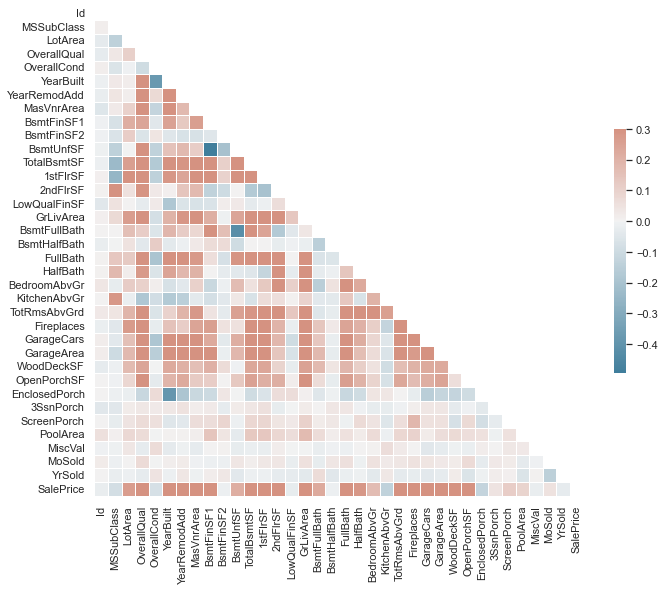

In [28]:
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [29]:
num=['OverallQual','YearBuilt','YearRemodAdd','1stFlrSF','GrLivArea','FullBath','TotRmsAbvGrd','GarageArea']

In [30]:
#Se realiza una lista con los nombre de las columnas con ina correlación mayor a 0.5 y que no sean valores redundantes como el # de coches que
#caben en el garage y el área del garage

In [31]:
y = pd.Series(df.SalePrice)

### Realizando una selección de las columnas categóricas que se utilizaran para prueva de hipótesis ANOVA

In [32]:
df.shape

(1460, 70)

In [33]:
columnas_cat = [column for column in df.columns if df[column].dtype == 'object']

In [34]:
len(columnas_cat)

34

In [35]:
columnas_cat

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [36]:
for col in columnas_cat:
    arras=df[col].value_counts()
    print(arras)

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
Pave    1454
Grvl       6
Name: Street, dtype: int64
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64
Norm      1260
Feedr       81
Artery     

In [37]:
#Eliminaremos de la lista de Columnas categoricas las que mustraron una disparidad muy grande en los datos
#ya que si una gran cantidad de datos tienen el mismo valor es muy probable que esta variable no 
#influya en el precio de venta de las casas

In [38]:
col_cat = [x for x in columnas_cat if x not in ('Street', 'Utilities','Condition2','RoofMatl','BsmtFinType2',
                                                'Heating','CentralAir','Electrical','PavedDrive')]

In [39]:
len(col_cat)

25

In [40]:
#Después de eliminar estas columnas, nos quedamos con 25 posibles columnas que pueden ser de importancia para 
# el precio de una casa

In [41]:
valuesp=[]
for colu in col_cat:
    modelo = ols(f'SalePrice ~ {colu}', data = df).fit()
    pvalue=sm.stats.anova_lm(modelo)['PR(>F)'][0]
    valuesp.append((pvalue,colu))

In [42]:
sorted(valuesp)

[(1.5586002827702678e-225, 'Neighborhood'),
 (1.4395510967785439e-204, 'ExterQual'),
 (8.158548084712274e-196, 'BsmtQual'),
 (3.03221275283851e-192, 'KitchenQual'),
 (5.791895002231574e-91, 'Foundation'),
 (2.3863579356150602e-71, 'BsmtFinType1'),
 (2.6670620921040538e-67, 'HeatingQC'),
 (1.2797035312661532e-63, 'MasVnrType'),
 (7.557758359195715e-50, 'BsmtExposure'),
 (7.988268404990495e-44, 'SaleCondition'),
 (2.5860887286373744e-43, 'Exterior1st'),
 (4.842185670698891e-43, 'Exterior2nd'),
 (5.039766889461878e-42, 'SaleType'),
 (8.8176338662734e-35, 'MSZoning'),
 (3.376776535121222e-25, 'HouseStyle'),
 (6.447523852011766e-25, 'LotShape'),
 (3.653523047099125e-17, 'RoofStyle'),
 (8.195793756121126e-16, 'BsmtCond'),
 (2.0567364604967015e-10, 'BldgType'),
 (2.7422167521379096e-08, 'LandContour'),
 (8.904549416138853e-08, 'Condition1'),
 (5.106680608671862e-07, 'ExterCond'),
 (3.163167473604189e-06, 'LotConfig'),
 (0.0004841696801078294, 'Functional'),
 (0.1413963584114019, 'LandSlope')]

In [43]:
# Nos quedaremos con las 5 variables que más seguridad tenemos de que las medias para cada valor son diferemtes

In [44]:
cat=['Neighborhood','ExterQual','BsmtQual','KitchenQual','Foundation']

In [45]:
for col in cat:
    arras=df[col].value_counts()
    print(arras)

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64
TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64
TA      649
Gd      618
Ex      121
None     37
Fa       35
Name: BsmtQual, dtype: int64
TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64
PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64


### Tiramos todas las columnas menos las deseadas del DF y Cambiamos columnas categoricas a numéricas

In [46]:
num.extend(cat)

In [47]:
df.drop(df.columns.difference(num), 1, inplace=True)

C:\Users\LUISFM~1\AppData\Local\Temp/ipykernel_19364/354723779.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df.drop(df.columns.difference(num), 1, inplace=True)


In [48]:
df

Neighborhood  OverallQual  YearBuilt  YearRemodAdd ExterQual Foundation  \
0         CollgCr            7       2003          2003        Gd      PConc   
1         Veenker            6       1976          1976        TA     CBlock   
2         CollgCr            7       2001          2002        Gd      PConc   
3         Crawfor            7       1915          1970        TA     BrkTil   
4         NoRidge            8       2000          2000        Gd      PConc   
...           ...          ...        ...           ...       ...        ...   
1455      Gilbert            6       1999          2000        TA      PConc   
1456       NWAmes            6       1978          1988        TA     CBlock   
1457      Crawfor            7       1941          2006        Ex      Stone   
1458        NAmes            5       1950          1996        TA     CBlock   
1459      Edwards            5       1965          1965        Gd     CBlock   

     BsmtQual  1stFlrSF  GrLivArea  FullBath KitchenQual  TotRmsAbvGrd  \
0          Gd       856       1710         2          Gd             8   
1          Gd      1262       1262         2          TA             6   
2          Gd       920       1786         2          Gd             6   
3          TA       961       1717         1          Gd             7   
4          Gd      1145       2198         2          Gd             9   
...       ...       ...        ...       ...         ...           ...   
1455       Gd       953       1647         2          TA             7   
1456       Gd      2073       2073         2          TA             7   
1457       TA      1188       2340         2          Gd             9   
1458       TA      1078       1078         1          Gd             5   
1459       TA      1256       1256         1          TA             6   

      GarageArea  
0            548  
1            460  
2            608  
3            642  
4            836  
...          ...  
1455         460  
1456         500  
1457         252  
1458         240  
1459         276  

[1460 rows x 13 columns]

In [49]:
df['Foundation'].replace(['PConc', 'CBlock','BrkTil','Slab','Stone','Wood'], [0, 1,2,3,4,5], inplace=True)

In [50]:
df['KitchenQual'].replace(['TA', 'Gd','Ex','Fa'], [0, 1,2,3], inplace=True)

In [51]:
df['BsmtQual'].replace(['TA', 'Gd','Ex','Fa', 'None'], [0, 1,2,3,4], inplace=True)

In [52]:
df['ExterQual'].replace(['TA', 'Gd','Ex','Fa'], [0, 1,2,3,], inplace=True)

In [71]:
dummies = pd.get_dummies(df.Neighborhood)
merged = pd.concat([df, dummies], axis='columns')
merged.drop(columns=['Neighborhood'], inplace=True, axis=1)

In [72]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 37 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   OverallQual   1460 non-null   int64
 1   YearBuilt     1460 non-null   int64
 2   YearRemodAdd  1460 non-null   int64
 3   ExterQual     1460 non-null   int64
 4   Foundation    1460 non-null   int64
 5   BsmtQual      1460 non-null   int64
 6   1stFlrSF      1460 non-null   int64
 7   GrLivArea     1460 non-null   int64
 8   FullBath      1460 non-null   int64
 9   KitchenQual   1460 non-null   int64
 10  TotRmsAbvGrd  1460 non-null   int64
 11  GarageArea    1460 non-null   int64
 12  Blmngtn       1460 non-null   uint8
 13  Blueste       1460 non-null   uint8
 14  BrDale        1460 non-null   uint8
 15  BrkSide       1460 non-null   uint8
 16  ClearCr       1460 non-null   uint8
 17  CollgCr       1460 non-null   uint8
 18  Crawfor       1460 non-null   uint8
 19  Edwards       1460 non-null

### Creación, entrenamiento y prueba de un modelo de regresión lineal

In [64]:
modelo_reg = LinearRegression()

In [73]:
modelo_reg.fit(merged, y)

LinearRegression()

In [74]:
modelo_reg.intercept_

-770589.681451925

In [75]:
modelo_reg.coef_

array([ 1.55424642e+04,  1.43552735e+02,  2.32471304e+02,  4.84625703e+03,
       -3.16696104e+03,  1.39192078e+03,  2.37085884e+01,  4.13572178e+01,
       -4.55143380e+03,  5.83804412e+03,  1.32501667e+03,  3.74842952e+01,
       -2.44868284e+04, -1.82362851e+04, -2.63101383e+04, -4.15379883e+03,
        2.06549484e+04, -5.64650468e+03,  1.96864640e+04, -1.71112234e+04,
       -4.80828222e+03, -2.04841041e+04, -1.46804504e+04, -7.62821244e+03,
       -6.21811779e+03, -1.03986995e+04, -7.77520464e+03,  5.15291745e+04,
        4.10915920e+04, -2.08529941e+04, -2.04924579e+04, -4.96006599e+03,
       -9.97714103e+03, -6.76446095e+02,  4.91031393e+04,  1.23945170e+04,
        3.04371198e+04])

In [77]:
valores = merged.iloc[[34,2,1,5]]

In [78]:
modelo_reg.predict(valores)

array([309720.9555239 , 214607.43578772, 192553.74095566, 130199.07427559])

In [79]:
y.iloc[[34,2,1,5]]

34    277500
2     223500
1     181500
5     143000
Name: SalePrice, dtype: int64

#### Conclusiones

##### 
Existe una diferencia entre los valores reales de precio de las casas y los valores obtenidos por el modelo aunque son valores que se acercan a los valores por rangos de 10,000 USD


Se podria realizar una mejor selección de columnas a utilizar como variables las cuales nos permitan tener un valor más aprosimado al valor real de venta


Se podria realizar un tipo de regresión distinto para intentar ajustarnos mejor a la acuación descrita por los precios de las casas